In [11]:
import pandas as pd

df = pd.read_csv('house_prices.csv')
df.head()


,Id,BldgType,LotArea,GrLivArea,YearBuilt,YrSold,SalePrice
0,1,1Fam,8450,1710.0,2003,2008,208500
1,2,1Fam,9600,NaN,1976,2007,181500
2,3,1Fam,11250,1786.0,2001,2008,223500
3,4,1Fam,9550,1717.0,1915,2006,140000
4,5,1Fam,14260,2198.0,2000,2008,250000


<font color='red'>Assignment:</font> Create a new DataFrame "df_new" which contains only single family residences (hint: df.BldgType == '1Fam')

In [12]:
df_new = df[df.BldgType == '1Fam']
print(df.BldgType.unique())
print(df_new.BldgType.unique())
print(pd.unique(df_new.BldgType))
print(pd.unique(df_new.BldgType))
df_new

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['1Fam']
['1Fam']
['1Fam']


,Id,BldgType,LotArea,GrLivArea,YearBuilt,YrSold,SalePrice
0,1,1Fam,8450,1710.0,2003,2008,208500
1,2,1Fam,9600,NaN,1976,2007,181500
2,3,1Fam,11250,1786.0,2001,2008,223500
3,4,1Fam,9550,1717.0,1915,2006,140000
4,5,1Fam,14260,2198.0,2000,2008,250000
...,...,...,...,...,...,...,...
1455,1439,1Fam,7407,1236.0,1957,2010,149700
1456,1447,1Fam,26142,1188.0,1962,2010,157900
1457,1457,1Fam,13175,2073.0,1978,2010,210000
1458,1458,1Fam,9042,2340.0,1941,2010,266500


<font color='red'>Assignment:</font> How many rows are there in df_new and how many rows are there in df? How many rows did you remove?

In [13]:
print(df.shape)
print(df_new.shape)
print("Number of rows in df is", len(df))
print("Number of rows in df_new is",len(df_new))

(1460, 7)
(1220, 7)
Number of rows in df is 1460
Number of rows in df_new is 1220


### 1460 rows in df, 1220 rows in df_new.  240 rows removed.

In [14]:
sorted(list(df_new.YrSold.unique()))

[2006, 2007, 2008, 2009, 2010]

In [15]:
train_raw = df_new[df_new.YrSold < 2010].reset_index(drop=True)
test_raw = df_new[df_new.YrSold >= 2010].reset_index(drop=True)
print(len(test_raw), len(train_raw))

143 1077


<font color='red'>Assignment:</font> check if there are any missing values in train_raw and test_raw.

In [16]:
print(train_raw.isnull())
print(train_raw[train_raw.isnull().any(axis=1)])
print(train_raw.isna())
test_raw.isnull()






         Id  BldgType  LotArea  GrLivArea  YearBuilt  YrSold  SalePrice
0     False     False    False      False      False   False      False
1     False     False    False       True      False   False      False
2     False     False    False      False      False   False      False
3     False     False    False      False      False   False      False
4     False     False    False      False      False   False      False
...     ...       ...      ...        ...        ...     ...        ...
1072  False     False    False      False      False   False      False
1073  False     False    False       True      False   False      False
1074  False     False    False      False      False   False      False
1075  False     False    False      False      False   False      False
1076  False     False    False      False      False   False      False

[1077 rows x 7 columns]
        Id BldgType  LotArea  GrLivArea  YearBuilt  YrSold  SalePrice
1        2     1Fam     9600        NaN  

,Id,BldgType,LotArea,GrLivArea,YearBuilt,YrSold,SalePrice
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
138,False,False,False,False,False,False,False
139,False,False,False,False,False,False,False
140,False,False,False,False,False,False,False
141,False,False,False,False,False,False,False


# Data Pre-processing

<font color='red'>Assignment:</font> Build a DataFrame named **train** which contains numerical values of **SalePrice** and **GrLivArea** in **train_raw**.

In [17]:
#train = train_raw.filter(['SalePrice','GrLivArea'],axis=1)

train= train_raw[['SalePrice','GrLivArea']].copy()
train


,SalePrice,GrLivArea
0,208500,1710.0
1,181500,NaN
2,223500,1786.0
3,140000,1717.0
4,250000,2198.0
...,...,...
1072,287090,1578.0
1073,84500,NaN
1074,185000,1221.0
1075,175000,1647.0


**Example:** Generate features and target.

In [18]:
features = list(train.columns)
target = "SalePrice"
features.remove(target)

X_train = train[features].copy()
y_train = train[target].copy()

**Example:** Imputing missing values in **X_train** using the column mean.

In [19]:
X_train = X_train.fillna(X_train.mean())

In [20]:
X_train.head()

,GrLivArea
0,1710.000000
1,1539.019473
2,1786.000000
3,1717.000000
4,2198.000000


<font color='red'>Assignment:</font> Get **X_test** and **y_test**.  

In [57]:
from sklearn.model_selection import train_test_split
test=test_raw[['GrLivArea','SalePrice'].copy()]
X_test=test[features].copy()
y_test=test[target].copy()

<font color='red'>Question:</font> Why do we use mean from **X_train** rather than mean from **X_test**?

### This is done to avoid data leakage. The training data set is meant to train the data whereas the actual testing happens with the test dataset.

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

**Example:** Initialize model

In [23]:
model = LinearRegression()

**Example:** Fit model

In [24]:
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Example:** Get prediction

In [25]:
y_train_pred = model.predict(X_train)
y_train_pred

array([204258.5216231 , 185873.4001857 , 212430.6173256 , ...,
       151677.53743205, 197484.28439603, 155441.0025582 ])

<font color='red'>Assignment:</font> Calculate **train loss**: **MAE**, **MSE**, and **R2 score**.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae=mean_absolute_error(y_train, y_train_pred)
print("Mean absolute error is ", mae)

mse = mean_squared_error(y_train,y_train_pred,squared='false')
print("Mean squared error is ", mse)

r2 = r2_score(y_train, y_train_pred)
print("r2_score is", r2)



Mean absolute error is  41856.51240871165
Mean squared error is  3997917652.340051
r2_score is 0.41333670988801474


<font color='red'>Assignment:</font> Visualize the difference between prediction and ground truth. Do you see any problem or anything unusual? Why? Hint: use plt.scatter()

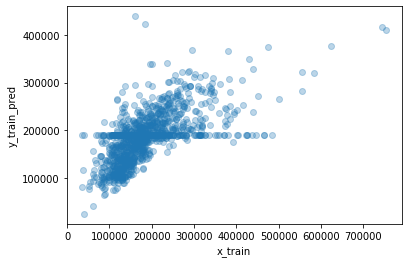

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_train, y_train_pred,alpha=0.3)
plt.xlabel('x_train')
plt.ylabel('y_train_pred')
plt.show()

<font color='red'>Question:</font> What are the coefficient and intercept for this model?

In [62]:
print('Coefficinet is', model.coef_)
print('Intercept is', model.intercept_)

AttributeError: 'Pipeline' object has no attribute 'coef_'

**Example:** Visualize the relationship between **sale price** and **living area**.

In [72]:
import numpy as np

def myPlot(area, price, model):
    plt.scatter(area, price, alpha=0.3)
    x = np.linspace(0, area.max())
    y = model.predict(x.reshape(-1,1))
    plt.plot(x, y, color='r')
    plt.xlabel('Living area')
    plt.ylabel('Sale price')
    plt.show()

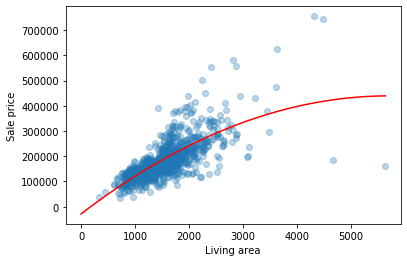

In [73]:
myPlot(train.GrLivArea, train.SalePrice, model)

<font color='red'>Assignment:</font> Calculate the **test loss**; visualize the comparision between prediction and ground truth, and the relationship between living area and sale price.

In [84]:
#hint: use model to predict price with test data first
import matplotlib.pyplot as plt
y_test_predict = model.predict(X_test)
print("Mean Absolute Error is {:.2e}".format(mean_absolute_error(y_test,y_test_predict)))
print("Mean square Error is {:.2e}".format(mean_squared_error(y_test,y_test_predict)))
print('R2 Score is {:.2f}'.format(r2_score(y_test,y_test_predict))
plt.scatter(y_test,y_test_predict)
plt.xlabel('y_test')
plt.ylabel('y_test_predict')

SyntaxError: invalid syntax (<ipython-input-84-6856e22a7c09>, line 7)

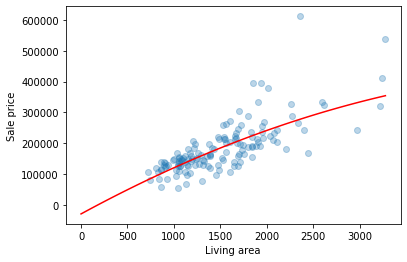

In [85]:
myPlot(test.GrLivArea,test.SalePrice,model)

# Polynomial Features

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
pf = PolynomialFeatures(degree=3)

In [77]:
pf.fit_transform(X_train)

array([[1.00000000e+00, 1.71000000e+03, 2.92410000e+06, 5.00021100e+09],
       [1.00000000e+00, 1.53901947e+03, 2.36858094e+06, 3.64529219e+09],
       [1.00000000e+00, 1.78600000e+03, 3.18979600e+06, 5.69697566e+09],
       ...,
       [1.00000000e+00, 1.22100000e+03, 1.49084100e+06, 1.82031686e+09],
       [1.00000000e+00, 1.64700000e+03, 2.71260900e+06, 4.46766702e+09],
       [1.00000000e+00, 1.25600000e+03, 1.57753600e+06, 1.98138522e+09]])

In [78]:
pf.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3']

In [79]:
pd.DataFrame(pf.transform(X_train), 
             columns=pf.get_feature_names()).head()

,1,x0,x0^2,x0^3
0,1.0,1710.000000,2.924100e+06,5.000211e+09
1,1.0,1539.019473,2.368581e+06,3.645292e+09
2,1.0,1786.000000,3.189796e+06,5.696976e+09
3,1.0,1717.000000,2.948089e+06,5.061869e+09
4,1.0,2198.000000,4.831204e+06,1.061899e+10


<font color='red'>Question:</font> What is each column in above dataframe?

## Features

## Pipeline

**Example:** use of **pipeline**.

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
steps = [('poly', PolynomialFeatures(degree=2)),
         ('lr', LinearRegression())]
model = Pipeline(steps)

**Example:** use pipeline as model.

In [38]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [39]:
y_train_pred = model.predict(X_train)

<font color='red'>Assignment:</font> Calculate regression metrics; visualize both **train** and **cost** loss; visualize relationship between **living area** and **sale price**.

### Regression metrics are: Mean Squared Error, Mean Absolute Error, Root Mean Squared Error


In [83]:
print("Mean Absolute Error is {:.2e}".format(mean_absolute_error(y_train,y_train_predict)))
print("Mean square Error is {:.2e}".format(mean_squared_error(y_train,y_train_predict)))
print('R2 Score is {:.2f}'.format(r2_score(y_train,y_train_predict))
plt.scatter(y_train,y_train_predict,alpha=0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_predict')
plt.show()

SyntaxError: invalid syntax (<ipython-input-83-86702182188b>, line 4)

<font color='red'>Question:</font> Does the model with polynomial features perform better? Why?


### Advantages of using Polynomial Regression:

### Polynomial provides the best approximation of the relationship between the dependent and independent variable.
### A Broad range of function can be fit under it. 
### Polynomial basically fits a wide range of curvature.

**Example:** Extract the linear model from pipeline

In [40]:
lr = model.steps[1][1]

**Example:** Extract the coefficents

In [41]:
lr.coef_

array([ 0.00000000e+00,  1.63784703e+02, -1.43272371e-02])

<font color='red'>Question:</font> Why is the coefficient for x^2 so small?

### As the degree of x progresses, the coefficient really becomes less, so all that matters in the end is the x term and its coefficient.

## Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
steps = [('poly', PolynomialFeatures(degree=2)),
         ('Rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
model = Pipeline(steps)

In [44]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Rescale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [45]:
model.steps[2][1].coef_

array([      0.        ,  869369.20419295, -454468.67062754])

<font color='red'>Question:</font> What does **MinMaxScaler** do? Why do we need it?

### Transform features by scaling each feature to a given range.

### This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

## High degree polynomial terms

<font color='red'>Assignment:</font> Repeat above steps with higher **degree** values in **PolynomialFeatures**. Hint: you can write a for loop to loop through degree 1 to 50, and record the MAE of train and test in mae_train and mae_test.

In [46]:
mae_train={}
mae_test={}
for i in range(1,50):
    steps = [('poly', PolynomialFeatures(degree=i)),('Rescale', MinMaxScaler()),('lr', LinearRegression())]
    # add your code here
    
    



<font color='red'>Assignment:</font> Visualize the change of train loss and test loss with polynomial degree value, respectively. Use **MAE**.

In [ ]:
print("Mean Absolute Error is {:.2e}".format(mean_absolute_error(y_train,y_train_predict)))

<font color='red'>Assignment:</font> Is there anything wrong with the approach in this notebook? Please try removing the rows with missing value in train instead of imputing it with mean, and see how the results change. You can create a new notebook to do it.